In [5]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input, initializers
from datetime import date
import numpy as np


# import competition_manager as cm
from competition_manager import *

In [6]:
import random
import os
def set_seed(seed=42):
    np.random.seed(seed)                  # Fix NumPy random seed
    random.seed(seed)                     # Fix Python built-in random seed
    tf.random.set_seed(seed)              # Fix TensorFlow random seed

    # Optional but recommended: configure TensorFlow for deterministic ops
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Call this function at the very start, before building or training your model
seed_value = 42
set_seed(seed_value)

## Prepare real players data

In [7]:
team_members = ["Andrey Spiridonov", "Andrey Trubicin", "Andrey Larionov", "Veselin", "Fedor", "Andrey Selifonov",
                "Dmitro Ilchenko", "Sergii Kolbasin", "Vlad", "Pavel Karacharov", "Sanya", "Roman", "Ivan", "Denys", "Vitalii Zhebrakovksy",
                "Oleksandr", "Loginov Dmitrii", "Artem Bykov", "Kirill", "Bondarev Yurii", "Gundars Mednis", "Alexandr Mikhailov",
                "Pedro Ispanec", "Dimon Sirnik Lozuk", "Sergey Konovalov", "Vladimir Chavskiy", "Alex Akimov", "Andrey", "Sanya DrugIlchenko", 
                "Vitalik goalkeeper", "Dimon Melkii"]


In [8]:
team_members_with_ids = {idx + 1: tm for idx, tm in enumerate(team_members)}
team_members_with_ids

{1: 'Andrey Spiridonov',
 2: 'Andrey Trubicin',
 3: 'Andrey Larionov',
 4: 'Veselin',
 5: 'Fedor',
 6: 'Andrey Selifonov',
 7: 'Dmitro Ilchenko',
 8: 'Sergii Kolbasin',
 9: 'Vlad',
 10: 'Pavel Karacharov',
 11: 'Sanya',
 12: 'Roman',
 13: 'Ivan',
 14: 'Denys',
 15: 'Vitalii Zhebrakovksy',
 16: 'Oleksandr',
 17: 'Loginov Dmitrii',
 18: 'Artem Bykov',
 19: 'Kirill',
 20: 'Bondarev Yurii',
 21: 'Gundars Mednis',
 22: 'Alexandr Mikhailov',
 23: 'Pedro Ispanec',
 24: 'Dimon Sirnik Lozuk',
 25: 'Sergey Konovalov',
 26: 'Vladimir Chavskiy',
 27: 'Alex Akimov',
 28: 'Andrey',
 29: 'Sanya DrugIlchenko',
 30: 'Vitalik goalkeeper',
 31: 'Dimon Melkii'}

In [9]:
len(team_members_with_ids)

31

{1: 'Andrey Spiridonov', #9.75
 2: 'Andrey Trubicin', # 9 
 3: 'Andrey Larionov', #5
 4: 'Veselin', # 6
 5: 'Fedor', # 7
 6: 'Andrey Selifonov', # 6.5
 7: 'Dmitro Ilchenko', #7.5
 8: 'Sergii Kolbasin', # 6.5
 9: 'Vlad', #4
 10: 'Pavel Karacharov', # 7
 11: 'Sanya', # 6
 12: 'Roman', # 6.5
 13: 'Ivan', # 9.25
 14: 'Denys', # 4.5
 15: 'Vitalii Zhebrakovksy', #6.75
 16: 'Oleksandr', #9.25
 17: 'Loginov Dmitrii', # 8.5
 18: 'Artem Bykov', # 7.5
 19: 'Kirill', #9.5
 20: 'Bondarev Yurii', # 5
 21: 'Gundars Mednis', # 5.5
 22: 'Alexandr Mikhailov', # 5.5
 23: 'Pedro Ispanec', #9.5
 24: 'Dimon Sirnik Lozuk', # 8.75
 25: 'Sergey Konovalov' # 6.5,
 26: 'Vladimir Chavskiy' # 8,
 27: 'Alex Akimov' # 7,
 28: 'Andrey' # 7.5,
 29: 'Sanya DrugIlchenko', #8
 30: 'Vitalik goalkeeper', #7,
 31: 'Dimon Melkii' # 6.5}

In [10]:
player_strengths_estimates = np.array([0, 9.5, 9, 5, 6, 8.5, 6.5, 7.5, 6.5,4, 7, 6,6.5, 9.25, 4.5, 6.75, 9.25, 8.5, 
                                       7.5, 9.5, 5, 5.5, 5.5 , 9.5, 8.75, 6.5, 8, 7, 7.5, 8 , 7, 6.5])

In [11]:
len(player_strengths_estimates)

32

In [12]:

def name_to_var(name):
    """Convert a full name string into a valid Python variable name."""
    # Lowercase, replace spaces with underscores, remove non-alphanumeric/underscore characters
    import re
    var = name.lower()
    var = var.replace(' ', '_')
    var = re.sub(r'[^0-9a-z_]', '', var)
    return var

# Define variables dynamically in globals()
for idx, name in team_members_with_ids.items():
    var_name = name_to_var(name)
    globals()[var_name] = idx

## Historical data / competitions

In [13]:
historical_cometitions = [
    Competition([loginov_dmitrii, andrey_spiridonov, veselin, alexandr_mikhailov, ivan],
     [kirill, andrey_trubicin, oleksandr, fedor, denys], 11, date(2025, 7, 13 ),
               {
                   fedor:6, andrey_trubicin:6, oleksandr:4, kirill:2, 
                   loginov_dmitrii:7, veselin:4, ivan:12, andrey_spiridonov:5
               }),

    Competition([roman, oleksandr, andrey_trubicin, denys, andrey_selifonov, veselin],
     [alex_akimov, loginov_dmitrii, andrey_larionov, vitalik_goalkeeper, artem_bykov, andrey_spiridonov], 1, date(2025, 7, 6 )),

    Competition([andrey_selifonov, roman, loginov_dmitrii, andrey_trubicin, kirill, vitalik_goalkeeper],
     [oleksandr, andrey_larionov, sergii_kolbasin, andrey_spiridonov, pavel_karacharov, vlad], 2, date(2025, 6, 22 ),
               {
                    andrey_trubicin: 8, andrey_selifonov: 2, kirill: 3, roman: 3, loginov_dmitrii: 4,
                    andrey_larionov: 1, andrey_spiridonov: 2, pavel_karacharov: 5, vlad: 4, sergii_kolbasin: 3, oleksandr: 2 
               }),

    Competition([ivan, artem_bykov, andrey_larionov, oleksandr, gundars_mednis, veselin, vitalii_zhebrakovksy, andrey_spiridonov],
     [andrey_trubicin, loginov_dmitrii, dimon_sirnik_lozuk, kirill, alex_akimov, dimon_melkii, roman, sergii_kolbasin], 3, date(2025, 6, 14 )),

    Competition([andrey_trubicin, loginov_dmitrii, roman, sergii_kolbasin, gundars_mednis],
     [andrey_spiridonov, oleksandr, vlad, alex_akimov, vitalii_zhebrakovksy], 3, date(2025, 6, 9 )),

    Competition([ivan, bondarev_yurii, loginov_dmitrii, andrey_larionov, fedor, andrey_spiridonov, roman, dimon_sirnik_lozuk],
     [oleksandr, dimon_melkii, andrey_selifonov, artem_bykov, andrey_trubicin, gundars_mednis, pedro_ispanec, veselin], 3, date(2025, 6, 8 ), 
               {
                   fedor: 6, andrey_larionov: 1, loginov_dmitrii: 2, bondarev_yurii: 1, andrey_spiridonov: 1, ivan: 1, dimon_sirnik_lozuk:1,
                   andrey_selifonov: 1, andrey_trubicin: 4, pedro_ispanec: 1, artem_bykov: 1, dimon_melkii: 1 
               }),

    Competition([andrey_larionov, vitalii_zhebrakovksy, roman, andrey_spiridonov, loginov_dmitrii, sergii_kolbasin],
     [oleksandr, veselin, andrey_selifonov, bondarev_yurii, alex_akimov, andrey_trubicin], 1, date(2025, 5, 25 ), 
               {
                   sergii_kolbasin: 2, roman: 2, loginov_dmitrii: 6, andrey_spiridonov: 4, andrey_larionov: 1,
                   oleksandr: 3, andrey_selifonov: 2, veselin: 4, andrey_trubicin: 4
               }),

    Competition([oleksandr, fedor, andrey_spiridonov, loginov_dmitrii, vitalii_zhebrakovksy, pavel_karacharov],
     [pedro_ispanec, andrey, andrey_trubicin, artem_bykov, roman, kirill], 1, date(2025, 5, 4 ),
               {
                   oleksandr: 4, loginov_dmitrii: 4, pavel_karacharov: 2, fedor: 1, andrey_spiridonov: 2, vitalii_zhebrakovksy: 1,
                    andrey_trubicin: 4, roman: 1, pedro_ispanec: 4, artem_bykov: 4
               }), # 14:13

    Competition([loginov_dmitrii, alex_akimov, andrey_larionov, oleksandr, veselin, andrey, andrey_trubicin],
     [bondarev_yurii, artem_bykov, ivan, gundars_mednis, andrey_selifonov, roman, andrey_spiridonov], -2, date(2025, 4, 12 ),
               {
                   andrey_trubicin: 7, andrey_larionov: 1, oleksandr: 1, 
                   andrey_selifonov: 3, andrey_spiridonov: 3, bondarev_yurii: 3, ivan: 1, artem_bykov: 1
               }), # 9:11

    Competition([andrey_larionov, gundars_mednis, andrey_spiridonov, loginov_dmitrii, andrey_selifonov],
     [oleksandr, vitalii_zhebrakovksy, andrey_trubicin, roman, denys], -3, date(2025, 4, 6 ),
               {
                   loginov_dmitrii: 4, andrey_spiridonov: 4, gundars_mednis: 2, andrey_selifonov: 2, andrey_larionov: 1,
                    oleksandr: 4, andrey_trubicin: 6, vitalii_zhebrakovksy: 3, denys: 1, roman: 2
               }), # 13:16

    
    
    Competition([andrey_trubicin, fedor, gundars_mednis, pedro_ispanec, loginov_dmitrii],
     [ivan, roman, alexandr_mikhailov, andrey_spiridonov, andrey_selifonov], -4, date(2025, 3, 29 )),

    Competition([loginov_dmitrii, dimon_sirnik_lozuk, roman, sanya, andrey_larionov, sergii_kolbasin, roman, denys],
     [veselin, andrey_spiridonov, andrey_trubicin, fedor, pedro_ispanec, artem_bykov, andrey, vlad], -4, date( 2025, 3, 22)),

    Competition([roman, andrey_spiridonov, andrey_trubicin, ivan, pedro_ispanec, denys, artem_bykov],
     [bondarev_yurii, fedor, kirill, oleksandr, andrey_larionov, veselin, loginov_dmitrii], 0, date(2025, 3, 9)),

    Competition([andrey_larionov, oleksandr, andrey_trubicin, veselin, loginov_dmitrii, kirill, roman, pedro_ispanec, pavel_karacharov],
     [ivan, dmitro_ilchenko, andrey_spiridonov, fedor, artem_bykov, sanya, sanya_drugilchenko, andrey_selifonov, alexandr_mikhailov], -1, date(2025, 3, 2)),

    Competition([oleksandr, vlad, andrey_spiridonov, artem_bykov, andrey_larionov, andrey_trubicin, roman, bondarev_yurii],
     [ivan, fedor, loginov_dmitrii, denys, dmitro_ilchenko, andrey_selifonov, sergii_kolbasin, pedro_ispanec], 1, date(2025, 2, 8)),

    Competition([roman, andrey_trubicin, ivan, andrey_spiridonov, veselin, vlad, sergii_kolbasin, andrey_selifonov],
     [denys, oleksandr, dmitro_ilchenko, fedor, artem_bykov, andrey_larionov, loginov_dmitrii, sanya], 0, date(2025, 2, 1)),

    Competition([loginov_dmitrii, alexandr_mikhailov, bondarev_yurii, pavel_karacharov, fedor, dmitro_ilchenko],
     [oleksandr, andrey_trubicin, andrey, andrey_larionov, artem_bykov, vitalii_zhebrakovksy], 0, date(2025, 1, 26)),

    
    Competition([bondarev_yurii, dmitro_ilchenko, roman, andrey_trubicin, andrey_spiridonov, vlad, pavel_karacharov, artem_bykov],
     [loginov_dmitrii, veselin, ivan, oleksandr, vitalii_zhebrakovksy, sergii_kolbasin, denys, andrey_larionov], 0, date(2025, 1, 18)),  # Black legs matter

    Competition([vitalii_zhebrakovksy, loginov_dmitrii, ivan, andrey_spiridonov, andrey_larionov, andrey_trubicin, veselin],
     [sanya, roman, denys, andrey_spiridonov, andrey_selifonov, oleksandr, alex_akimov], 0, date(2024, 12, 29)),
]

In [14]:
len(historical_cometitions)

19

In [15]:

NUM_PLAYERS = len(team_members_with_ids)
MIN_TEAM_SIZE = 5
MAX_TEAM_SIZE = 9
NUM_GAMES = len(historical_cometitions)

teamA_data = np.zeros((NUM_GAMES, MAX_TEAM_SIZE), dtype=int)
teamB_data = np.zeros((NUM_GAMES, MAX_TEAM_SIZE), dtype=int)
outcomes = np.zeros(NUM_GAMES)

print(f"Shape of teamA_data: {teamA_data.shape}")

for comp_i, competition in enumerate(historical_cometitions):

    teamA_players = competition.team_a
    teamB_players = competition.team_b
    assert len(teamA_players) == len(teamB_players), f"Teams are supposed to be of equal size, Team A:{len(teamA_players)} Team B: {len(teamB_players)}"
    team_size = len(teamA_players)

    outcomes[comp_i] = competition.score_diff

    # print(teamA_players)
    # print(teamB_players)
    # Pad teams to max size using zeros (which corresponds to masked player)
    teamA_data[comp_i, :team_size] = teamA_players
    teamB_data[comp_i, :team_size] = teamB_players

print("teamA_data shape:", teamA_data.shape)
print("teamB_data shape:", teamB_data.shape)
print("outcomes shape:", outcomes.shape)

Shape of teamA_data: (19, 9)
teamA_data shape: (19, 9)
teamB_data shape: (19, 9)
outcomes shape: (19,)


In [16]:
teamA_data

array([[17,  1,  4, 22, 13,  0,  0,  0,  0],
       [12, 16,  2, 14,  6,  4,  0,  0,  0],
       [ 6, 12, 17,  2, 19, 30,  0,  0,  0],
       [13, 18,  3, 16, 21,  4, 15,  1,  0],
       [ 2, 17, 12,  8, 21,  0,  0,  0,  0],
       [13, 20, 17,  3,  5,  1, 12, 24,  0],
       [ 3, 15, 12,  1, 17,  8,  0,  0,  0],
       [16,  5,  1, 17, 15, 10,  0,  0,  0],
       [17, 27,  3, 16,  4, 28,  2,  0,  0],
       [ 3, 21,  1, 17,  6,  0,  0,  0,  0],
       [ 2,  5, 21, 23, 17,  0,  0,  0,  0],
       [17, 24, 12, 11,  3,  8, 12, 14,  0],
       [12,  1,  2, 13, 23, 14, 18,  0,  0],
       [ 3, 16,  2,  4, 17, 19, 12, 23, 10],
       [16,  9,  1, 18,  3,  2, 12, 20,  0],
       [12,  2, 13,  1,  4,  9,  8,  6,  0],
       [17, 22, 20, 10,  5,  7,  0,  0,  0],
       [20,  7, 12,  2,  1,  9, 10, 18,  0],
       [15, 17, 13,  1,  3,  2,  4,  0,  0]])

## Version of the model for real data

In [17]:
teamB_data.shape

(19, 9)

## Masked MSE function

In [18]:
def masked_mse(missing_value=-1.0):
    def loss(y_true, y_pred):
        mask = tf.not_equal(y_true, missing_value)
        y_true_masked = tf.boolean_mask(y_true, mask)
        y_pred_masked = tf.boolean_mask(y_pred, mask)
        loss_value = tf.reduce_mean(tf.square(y_true_masked - y_pred_masked))
        # print(f"Loss value {y_true.numpy()}: {loss_value}") tensors are only symbolic at this stage. Only with eager execution can work
        # tf.print("goals_out y_true:", y_true, summarize=10)
        # tf.print("goals_out mask:", mask, summarize=10)
        # tf.print("goals_out y_true_masked:", y_true_masked, summarize=100)
        # tf.print("goals_out y_pred_masked:", y_pred_masked, summarize=100)
        
        return loss_value
    return loss

In [19]:
import matplotlib.pyplot as plt

def monitor_training_overfitting(history):
    # Assume 'history' is the object returned by your call to model.fit(...)
    
    # Plot training and validation accuracy
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['game_outcome_mean_absolute_error'], label='Training MAE')
    plt.plot(history.history['val_game_outcome_mean_absolute_error'], label='Validation MAE')
    plt.xlabel('Epoch')
    plt.ylabel('mean_absolute_error')
    plt.title('Game outcome Training vs Validation MAE')
    plt.legend()
    
    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


## Building a model / model definition

In [20]:
NUM_PLAYERS

31

In [44]:

def build_model(num_players, player_emb_dim, max_team_size):

    #TODO max_team_size is not used??
    
    # Inputs: variable-length teams
    # teamA_input = Input(shape=(9,), dtype='int32', name='teamA')  # variable-length
    # teamB_input = Input(shape=(9,), dtype='int32', name='teamB')  # variable-length
    teamA_input = Input(batch_shape=(19, 9), dtype='int32', name='teamA')  # variable-length
    teamB_input = Input(batch_shape=(19, 9), dtype='int32', name='teamB')  # variable-length
    # teamB_input = Input(shape=(None,), dtype='int32', name='teamB')  # variable-length
    
    # Embedding layer with mask support
    player_embedding = layers.Embedding(
        input_dim=num_players + 1,  # includes 0 for mask
        output_dim=player_emb_dim,
        embeddings_initializer=initializers.GlorotUniform(seed=seed_value),
        mask_zero=True,  # Important: enables automatic masking for padding (0 as pad token)
        # embeddings_regularizer=tf.keras.regularizers.l2(1e-4),
        name='player_embedding'
    )
    
    # Embed team players
    teamA_embeds = player_embedding(teamA_input)  # shape: (batch, teamA_len, emb_dim)
    teamB_embeds = player_embedding(teamB_input)
    
    # Self-attention block (respects masks automatically if using Functional API)
    def self_attention_block(x, name_prefix=''):
        attn_output = layers.MultiHeadAttention(
            num_heads=4,
            key_dim=player_emb_dim,
            dropout=0.1,
            name=f'{name_prefix}_attn'
        )(x, x)
        x = layers.Add(name=f'{name_prefix}_residual')([x, attn_output])
        x = layers.LayerNormalization(name=f'{name_prefix}_norm')(x)
        return x
    
    # Apply attention
    teamA_attn = self_attention_block(teamA_embeds, 'teamA')
    teamB_attn = self_attention_block(teamB_embeds, 'teamB')
    
    # Global average pooling over valid (non-padded) tokens
    # TF handles masking automatically in GlobalAveragePooling1D if mask_zero=True
    teamA_vector = layers.GlobalAveragePooling1D(name='teamA_avgpool')(teamA_attn)
    teamB_vector = layers.GlobalAveragePooling1D(name='teamB_avgpool')(teamB_attn)
    
    # Matchup modeling (difference vector)
    matchup_vector = layers.Subtract(name='matchup_diff')([teamA_vector, teamB_vector])
    
    # Concatenate summary representation
    match_input = layers.Concatenate(name='match_features')([teamA_vector, teamB_vector, matchup_vector])
    
    # Feedforward classification head
    x = layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(match_input)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = layers.Dropout(0.3)(x)
    
    outcome = layers.Dense(1, activation='linear', name='game_outcome')(x)
    
    # Output 2: Player goals (per player in both teams, flatten and predict goals per player)
    all_team_players = layers.Concatenate(axis=1)([teamA_input, teamB_input])  # shape (batch, 2*max_team_size)
    emb_all = player_embedding(all_team_players)  # shape (batch, 2*max_team_size, emb_dim)
    goals_dense = layers.TimeDistributed(layers.Dense(1))(emb_all)
    goals_out = layers.Flatten(name="player_goals")(goals_dense)  # shape (batch, 2*max_team_size)
    # goals_out = layers.Lambda(lambda x: tf.reshape(x, (tf.shape(x)[0], -1)), name="player_goals")(goals_dense)

    # Final model
    model = Model(inputs=[teamA_input, teamB_input], outputs=[outcome, goals_out])
    model.compile(optimizer='adam', 
                  # loss='mean_squared_error',   # or 'mean_absolute_error'
                  #   metrics=['mean_absolute_error']
                  loss={"game_outcome": "mean_squared_error", "player_goals": masked_mse(missing_value=-1.0)},
                  loss_weights={
                        "game_outcome": 1.0,     # full weight
                        "player_goals": 0.0      # reduce influence of goals output loss by factor of 10
                    },
                   metrics={"game_outcome": "mean_absolute_error"}
                 )

    
    # model.summary()
    return model

In [45]:
def competitions_goals_to_player_goals(competitions, num_games, max_team_size):
    base = np.full((num_games, 2 * max_team_size), -1)
    # print(base.shape)
    def pad_team(players):
        padded = players + [0]*(max_team_size - len(players))
        return padded
    
    for comp_i, competition in enumerate(historical_cometitions):
        # print(comp_i)
        # print(competition)
        # players should be in the same order as when we are building team's embeddings
        all_players = pad_team(competition.team_a) + pad_team(competition.team_b)
        for key, val in competition.scores_stats.items():
            idx_for_player = all_players.index(key)
            base[comp_i, idx_for_player] = val
    return base
    
    

In [46]:
player_goals = competitions_goals_to_player_goals(historical_cometitions, NUM_GAMES, MAX_TEAM_SIZE) #np.random.rand(NUM_GAMES, 2 * MAX_TEAM_SIZE)
player_goals

array([[ 7,  5,  4, -1, 12, -1, -1, -1, -1,  2,  6,  4,  6, -1, -1, -1,
        -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1],
       [ 2,  3,  4,  8,  3, -1, -1, -1, -1,  2,  1,  3,  2,  5,  4, -1,
        -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1],
       [ 1,  1,  2,  1,  6,  1, -1,  1, -1, -1,  1,  1,  1,  4, -1,  1,
        -1, -1],
       [ 1, -1,  2,  4,  6,  2, -1, -1, -1,  3,  4,  2, -1, -1,  4, -1,
        -1, -1],
       [ 4,  1,  2,  4,  1,  2, -1, -1, -1,  4, -1,  4,  4,  1, -1, -1,
        -1, -1],
       [-1, -1,  1,  1, -1, -1,  7, -1, -1,  3,  1,  1, -1,  3, -1,  3,
        -1, -1],
       [ 1,  2,  4,  4,  2, -1, -1, -1, -1,  4,  3,  6,  2,  1, -1, -1,
        -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1],
       [-1, -1, -1, -

In [47]:
has_goals = (~np.all(player_goals == -1, axis=1)).astype(float)
has_goals

array([1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [48]:
max_goals = np.max(player_goals[player_goals != -1])  # exclude missing values marked as -1
print(f"Max goals in dataset: {max_goals}")

Max goals in dataset: 12


In [49]:
# Create a copy to avoid modifying original data
scaled_player_goals = np.copy(player_goals).astype(float) # otherwise values will be rounded to 0

# Scale non-missing elements
mask = (player_goals != -1)
scaled_player_goals[mask] = player_goals[mask] / max_goals

# Leave missing values as is (-1)

In [50]:
scaled_player_goals

array([[ 0.58333333,  0.41666667,  0.33333333, -1.        ,  1.        ,
        -1.        , -1.        , -1.        , -1.        ,  0.16666667,
         0.5       ,  0.33333333,  0.5       , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [ 0.16666667,  0.25      ,  0.33333333,  0.66666667,  0.25      ,
        -1.        , -1.        , -1.        , -1.        ,  0.16666667,
         0.08333333,  0.25      ,  0.16666667,  0.41666667,  0.33333333,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.   

## Run training over K folds

Embedding vector for player zero before training: [-0.13323195 -0.00096944  0.13194087 -0.29381505 -0.25805488  0.07750148
  0.15615395 -0.20011973 -0.22736615 -0.27393228  0.27099267 -0.16506381
 -0.01375294 -0.15520269  0.13752416  0.16476852  0.02260321 -0.20287587
  0.00171983 -0.1837469  -0.28457138 -0.11464813 -0.01568022  0.03661951
  0.19812527  0.05595043 -0.11006211  0.16076088 -0.22917882  0.06002998
 -0.12077236  0.21608105]


2025-08-06 19:21:52.795158: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_17}}
2025-08-06 19:21:52.795490: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

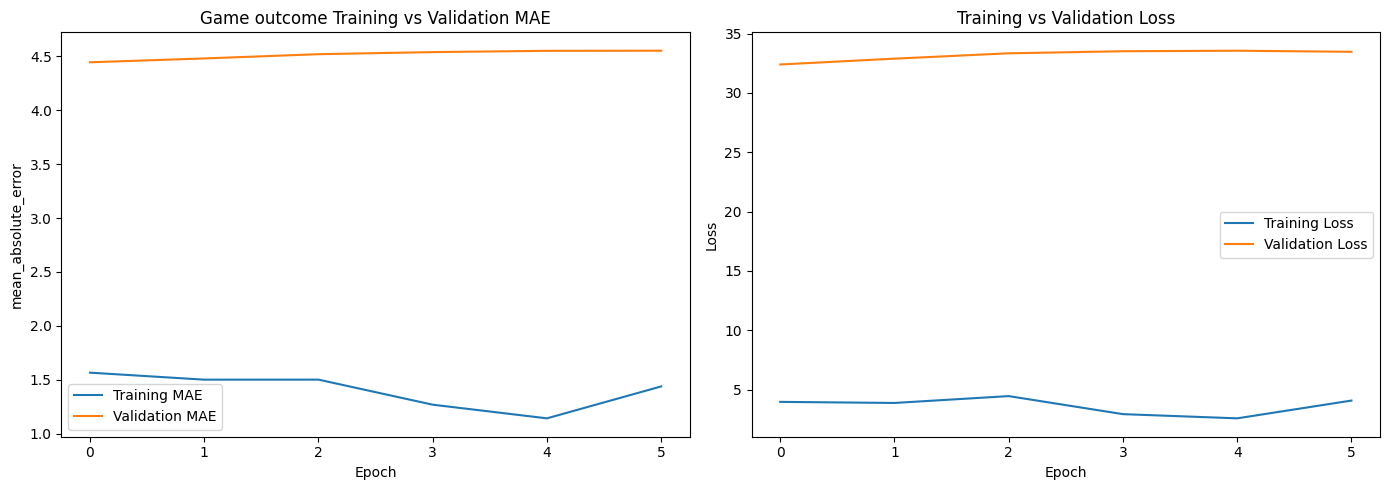

Embedding vector for player zero after training: [-0.13323195 -0.00096944  0.13194087 -0.29381505 -0.25805488  0.07750148
  0.15615395 -0.20011973 -0.22736615 -0.27393228  0.27099267 -0.16506381
 -0.01375294 -0.15520269  0.13752416  0.16476852  0.02260321 -0.20287587
  0.00171983 -0.1837469  -0.28457138 -0.11464813 -0.01568022  0.03661951
  0.19812527  0.05595043 -0.11006211  0.16076088 -0.22917882  0.06002998
 -0.12077236  0.21608105]
Change in player zero embedding vector: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - game_outcome_loss: 32.3801 - game_outcome_mean_absolute_error: 4.4456 - loss: 32.3921 - player_goals_loss: 0.2567
Fold val total_loss: 32.3921 | Fold val game_outcome_loss: 32.3801 | val player_goals_loss: 0.2567 | metric: 4.4456
Embedding vector for player zero before training: [-0.13323195 -0.00096944  0.13194087 -0.29381505 -0.25805488  0.07750148
  0.15615395 -0.20011973 -0.22736615 -0.27393228  0.27099267 -0.16506381
 -0.01375294 -0.15520269  0.13752416  0.16476852  

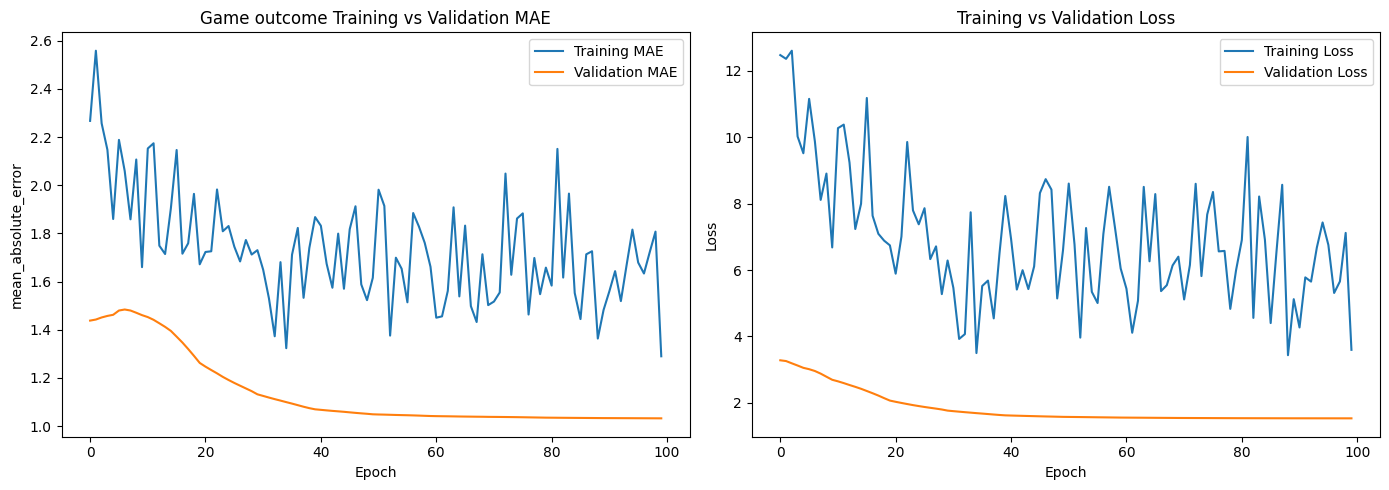

Embedding vector for player zero after training: [-0.13323195 -0.00096944  0.13194087 -0.29381505 -0.25805488  0.07750148
  0.15615395 -0.20011973 -0.22736615 -0.27393228  0.27099267 -0.16506381
 -0.01375294 -0.15520269  0.13752416  0.16476852  0.02260321 -0.20287587
  0.00171983 -0.1837469  -0.28457138 -0.11464813 -0.01568022  0.03661951
  0.19812527  0.05595043 -0.11006211  0.16076088 -0.22917882  0.06002998
 -0.12077236  0.21608105]
Change in player zero embedding vector: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - game_outcome_loss: 1.5232 - game_outcome_mean_absolute_error: 1.0321 - loss: 1.5355 - player_goals_loss: 0.0874
Fold val total_loss: 1.5355 | Fold val game_outcome_loss: 1.5232 | val player_goals_loss: 0.0874 | metric: 1.0321
Embedding vector for player zero before training: [-0.13323195 -0.00096944  0.13194087 -0.29381505 -0.25805488  0.07750148
  0.15615395 -0.20011973 -0.22736615 -0.27393228  0.27099267 -0.16506381
 -0.01375294 -0.15520269  0.13752416  0.16476852  0.02

2025-08-06 19:21:59.419068: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_17}}
2025-08-06 19:21:59.419313: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

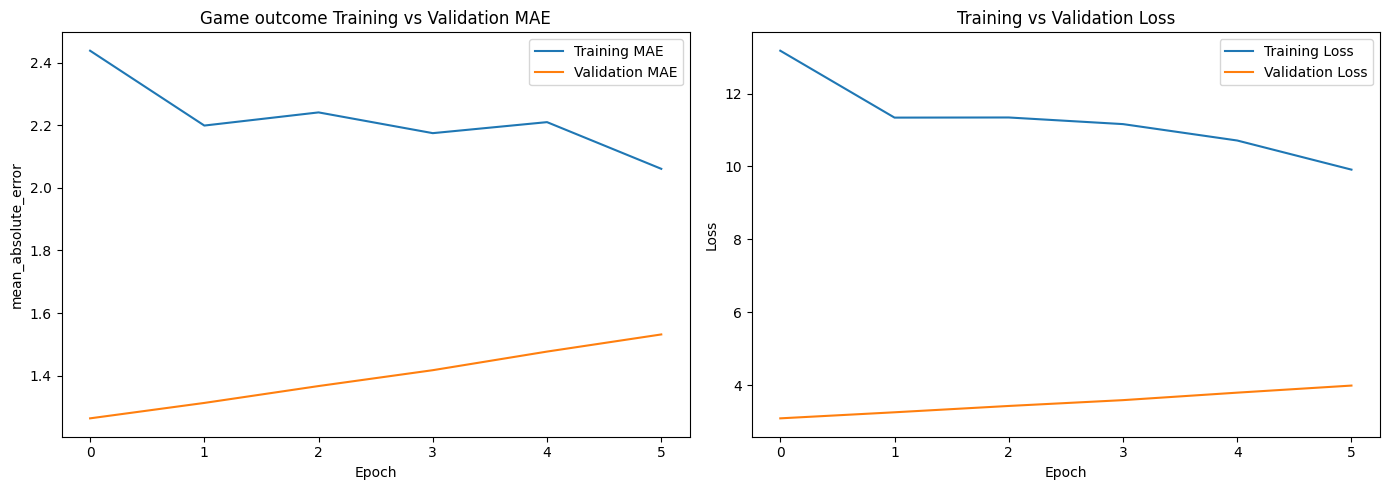

Embedding vector for player zero after training: [-0.13323195 -0.00096944  0.13194087 -0.29381505 -0.25805488  0.07750148
  0.15615395 -0.20011973 -0.22736615 -0.27393228  0.27099267 -0.16506381
 -0.01375294 -0.15520269  0.13752416  0.16476852  0.02260321 -0.20287587
  0.00171983 -0.1837469  -0.28457138 -0.11464813 -0.01568022  0.03661951
  0.19812527  0.05595043 -0.11006211  0.16076088 -0.22917882  0.06002998
 -0.12077236  0.21608105]
Change in player zero embedding vector: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - game_outcome_loss: 3.0835 - game_outcome_mean_absolute_error: 1.2635 - loss: 3.0954 - player_goals_loss: 0.0982
Fold val total_loss: 3.0954 | Fold val game_outcome_loss: 3.0835 | val player_goals_loss: 0.0982 | metric: 1.2635
Embedding vector for player zero before training: [-0.13323195 -0.00096944  0.13194087 -0.29381505 -0.25805488  0.07750148
  0.15615395 -0.20011973 -0.22736615 -0.27393228  0.27099267 -0.16506381
 -0.01375294 -0.15520269  0.13752416  0.16476852  0.02

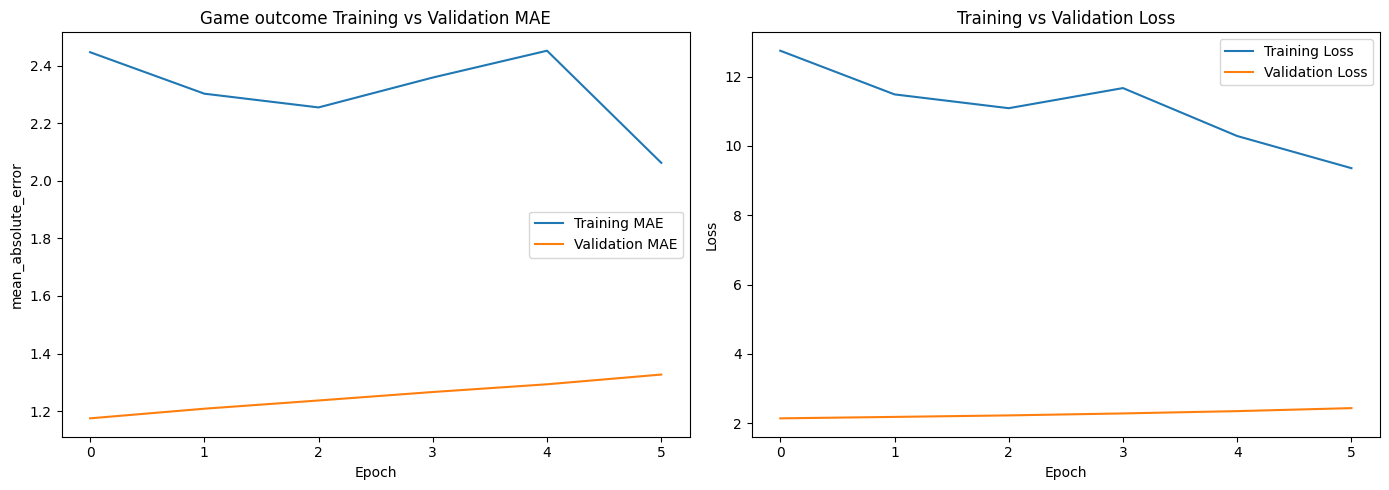

Embedding vector for player zero after training: [-0.13323195 -0.00096944  0.13194087 -0.29381505 -0.25805488  0.07750148
  0.15615395 -0.20011973 -0.22736615 -0.27393228  0.27099267 -0.16506381
 -0.01375294 -0.15520269  0.13752416  0.16476852  0.02260321 -0.20287587
  0.00171983 -0.1837469  -0.28457138 -0.11464813 -0.01568022  0.03661951
  0.19812527  0.05595043 -0.11006211  0.16076088 -0.22917882  0.06002998
 -0.12077236  0.21608105]
Change in player zero embedding vector: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - game_outcome_loss: 2.1268 - game_outcome_mean_absolute_error: 1.1748 - loss: 2.1386 - player_goals_loss: 0.1706
Fold val total_loss: 2.1386 | Fold val game_outcome_loss: 2.1268 | val player_goals_loss: 0.1706 | metric: 1.1748
Embedding vector for player zero before training: [-0.13323195 -0.00096944  0.13194087 -0.29381505 -0.25805488  0.07750148
  0.15615395 -0.20011973 -0.22736615 -0.27393228  0.27099267 -0.16506381
 -0.01375294 -0.15520269  0.13752416  0.16476852  0.02

2025-08-06 19:22:05.335606: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_17}}
2025-08-06 19:22:05.335863: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

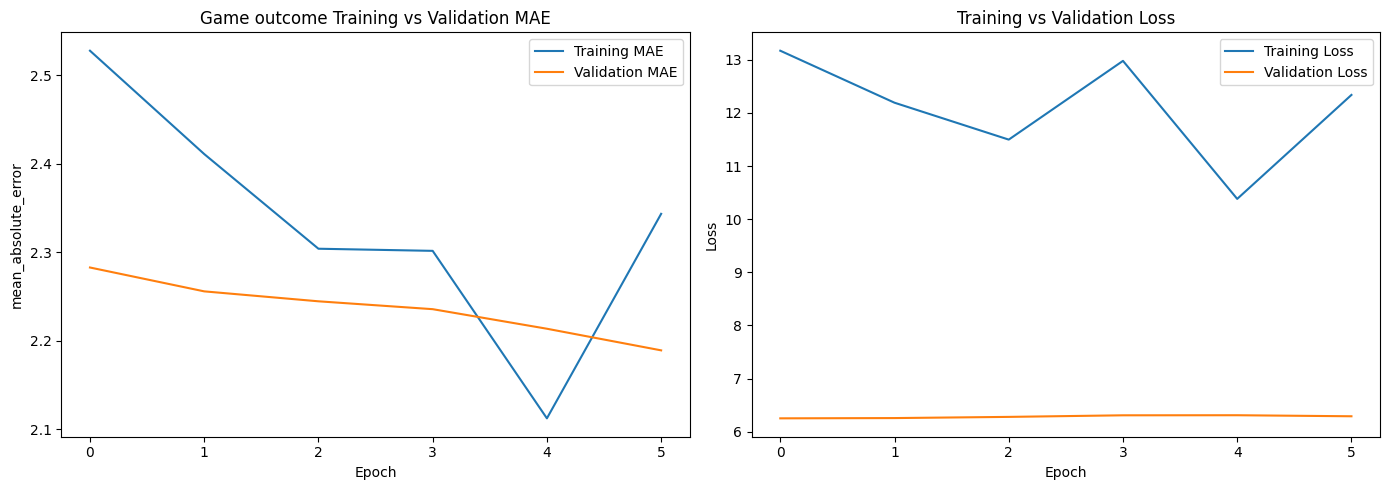

Embedding vector for player zero after training: [-0.13323195 -0.00096944  0.13194087 -0.29381505 -0.25805488  0.07750148
  0.15615395 -0.20011973 -0.22736615 -0.27393228  0.27099267 -0.16506381
 -0.01375294 -0.15520269  0.13752416  0.16476852  0.02260321 -0.20287587
  0.00171983 -0.1837469  -0.28457138 -0.11464813 -0.01568022  0.03661951
  0.19812527  0.05595043 -0.11006211  0.16076088 -0.22917882  0.06002998
 -0.12077236  0.21608105]
Change in player zero embedding vector: 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - game_outcome_loss: 6.2391 - game_outcome_mean_absolute_error: 2.2828 - loss: 6.2508 - player_goals_loss: 0.3056
Fold val total_loss: 6.2508 | Fold val game_outcome_loss: 6.2391 | val player_goals_loss: 0.3056 | metric: 2.2828
Mean cross-validated accuracy: 9.0825


In [51]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


X = [teamA_data, teamB_data]
y = [outcomes, scaled_player_goals]


# 3. Optional: callbacks for monitoring
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define a learning rate schedule function (step decay example)
def lr_schedule(epoch, lr):
    drop_rate = 0.5
    epochs_drop = 10
    if epoch > 0 and epoch % epochs_drop == 0:
        return lr * drop_rate
    return lr

#Instantiate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# Or adaptive reduction on plateau (reduce LR when val_loss stalls)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                                 patience=5, min_lr=1e-6)

NUM_PLAYERS = len(team_members_with_ids)
PLAYER_EMB_DIM = 32

# K-fold CV setup
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cv_scores = []
for train_ix, val_ix in kf.split(teamA_data):
    model = build_model(NUM_PLAYERS, PLAYER_EMB_DIM, MAX_TEAM_SIZE)
    X_train = [teamA_data[train_ix], teamB_data[train_ix]]
    X_val   = [teamA_data[val_ix], teamB_data[val_ix]]
    y_train = [outcomes[train_ix], scaled_player_goals[train_ix]]
    y_val   = [outcomes[val_ix], scaled_player_goals[val_ix]]

    
    # Only fo debuggind purposes
    player_embedding_layer = model.get_layer("player_embedding")
    embeddings_before_fold = player_embedding_layer.get_weights()[0].copy()
    print("Embedding vector for player zero before training:", embeddings_before_fold[0])

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100, batch_size=32, verbose=0,
        callbacks=[lr_scheduler, reduce_lr, early_stop],
        # sample_weight={  # sample_weight can be a dict by output name
        #     "player_goals": has_goals,
        #     "game_outcome": np.ones(len(outcomes))  # no masking for outcome
        # },
    )
    # Only fo debuggind purposes
    monitor_training_overfitting(history)

    # Only fo debuggind purposes
    pe_layer = model.get_layer("player_embedding")
    embeddings_after_fold = pe_layer.get_weights()[0]
    print("Embedding vector for player zero after training:", embeddings_after_fold[0])

    # Only fo debuggind purposes
    change = np.linalg.norm(embeddings_after_fold[0] - embeddings_before_fold[0])
    print("Change in player zero embedding vector:", change)

        
    score = model.evaluate(X_val, y_val, verbose=1)
    print(f"Fold val total_loss: {score[0]:.4f} | Fold val game_outcome_loss: {score[1]:.4f} | val player_goals_loss: {score[2]:.4f} | metric: {score[3]:.4f}")
    cv_scores.append(score[0])  # game_outcome accuracy (check metric order in model.evaluate)
print(f"Mean cross-validated accuracy: {np.mean(cv_scores):.4f}")


In [52]:
final_model = build_model(NUM_PLAYERS, PLAYER_EMB_DIM, MAX_TEAM_SIZE)
final_model.fit(
    [teamA_data, teamB_data], [outcomes, scaled_player_goals],
    epochs=100, batch_size=32, verbose=1
)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - game_outcome_loss: 10.5090 - game_outcome_mean_absolute_error: 2.3136 - loss: 10.5209 - player_goals_loss: 0.1245
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - game_outcome_loss: 9.6608 - game_outcome_mean_absolute_error: 2.0413 - loss: 9.6727 - player_goals_loss: 0.1244
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - game_outcome_loss: 10.8853 - game_outcome_mean_absolute_error: 2.1844 - loss: 10.8972 - player_goals_loss: 0.1242
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - game_outcome_loss: 9.3289 - game_outcome_mean_absolute_error: 2.1670 - loss: 9.3407 - player_goals_loss: 0.1240
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - game_outcome_loss: 8.5281 - game_outcome_mean_absolute_error: 2.0659 - loss: 8.5400 - player_goals_loss: 0.1238
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - game_outcome_loss: 8.5950 - game_outcome_mean_absolute_error: 2.0883 - loss: 8.6069 - player_goals_loss: 0.1235
Epoch 7/100
1/

## Predicting for the match

In [60]:
teamA_players = [vitalii_zhebrakovksy, loginov_dmitrii, ivan, andrey_spiridonov, andrey_larionov, andrey_trubicin, veselin]   # player IDs for Team A
teamB_players = [sanya, roman, denys, andrey_spiridonov, andrey_selifonov, oleksandr, alex_akimov]      # player IDs for Team B
teamA_players

[15, 17, 13, 1, 3, 2, 4]

In [30]:

MAX_TEAM_SIZE = 9  # Should match model's expected size

# Pad teams to MAX_TEAM_SIZE with 0 (mask token)
def pad_team(players, max_size):
    padded = players + [0]*(max_size - len(players))
    return np.array(padded)

teamA_input = pad_team(teamA_players, MAX_TEAM_SIZE)
teamB_input = pad_team(teamB_players, MAX_TEAM_SIZE)

# Add batch dimension: shape (1, MAX_TEAM_SIZE)
teamA_input = np.expand_dims(teamA_input, axis=0)
teamB_input = np.expand_dims(teamB_input, axis=0)

# Predict using the trained model
prediction = model.predict([teamA_input, teamB_input])
print(prediction)
# If model output is sigmoid probability of Team A win:
# prob_teamA_wins = prediction[0][0]

# print(f"Predicted probability that Team A wins: {prob_teamA_wins:.3f}")

# # Optional: Decide class label
# predicted_label = 1 if prob_teamA_wins > 0.5 else 0
# print("Predicted winner:", "Team A" if predicted_label == 1 else "Team B")


AttributeError: 'list' object has no attribute 'shape'

In [244]:

# teamA_pls = teamA_players
# print(" Team A players: ", teamA_pls)
# teamA_str = player_strengths[teamA_pls]
# print(f" Team A palyers' stregths:{teamA_str}, Total: {teamA_str.sum()}")

# teamB_pls = teamB_players
# print(" Team B players: ", teamB_pls)
# teamB_str = player_strengths[teamB_pls]
# print(f" Team B palyers' stregths:{teamB_str}, Total: {teamB_str.sum()}")
# # print(" Label (Team A wins=1):", outcomes[i])

In [67]:
# outcome = teamA_strength - teamB_strength
# competition_res = 1 if outcome > 0 else 0
# competition_res

## Checking embeddings for player-zero didn't change

In [46]:
player_embedding_layer = final_model.get_layer("player_embedding")
print(player_embedding_layer.get_weights())
embeddings_after = player_embedding_layer.get_weights()[0]
print("Embedding vector for player zero after training:", embeddings_after[0])

[array([[-0.13323195, -0.00096944,  0.13194087, ...,  0.06002998,
        -0.12077236,  0.21608105],
       [ 0.25799596,  0.14437412, -0.12090246, ...,  0.2338862 ,
        -0.22508083,  0.27917218],
       [ 0.05737278, -0.18427649,  0.0448258 , ...,  0.03547481,
         0.11724964,  0.01851659],
       ...,
       [-0.24211977,  0.14603835, -0.07750341, ...,  0.14155856,
        -0.20976669, -0.02695062],
       [ 0.20007047,  0.16510814,  0.03071143, ..., -0.04832422,
         0.1226583 , -0.12132613],
       [ 0.22340769,  0.16554756,  0.26984534, ...,  0.07564413,
        -0.07597711, -0.22517112]], dtype=float32)]
Embedding vector for player zero after training: [-0.13323195 -0.00096944  0.13194087 -0.29381505 -0.25805488  0.07750148
  0.15615395 -0.20011973 -0.22736615 -0.27393228  0.27099267 -0.16506381
 -0.01375294 -0.15520269  0.13752416  0.16476852  0.02260321 -0.20287587
  0.00171983 -0.1837469  -0.28457138 -0.11464813 -0.01568022  0.03661951
  0.19812527  0.05595043 -0.1

[-5.07739708e-02 -4.36284972e-06  4.96770889e-02 -2.01140255e-01
 -1.66482732e-01  9.76330414e-03  7.08238930e-02 -1.11250795e-01
 -1.37040332e-01 -1.81832418e-01  1.78985596e-01 -7.88500682e-02
  6.81006131e-05 -6.99735954e-02  5.44489920e-02  7.85823390e-02
  1.21108722e-04 -1.13840222e-01  8.64824688e-06 -9.59808752e-02
 -1.92153260e-01 -3.54439728e-02  9.12378673e-05 -2.82771420e-04
  1.09380044e-01  1.10181991e-03 -3.18431519e-02  7.49605969e-02
 -1.38769433e-01  2.19749822e-03 -4.03767787e-02  1.26310453e-01]

In [47]:
change = np.linalg.norm(embeddings_after[0] - embeddings_before[0])
print("Change in player zero embedding vector:", change)

NameError: name 'embeddings_before' is not defined

## Extracting embeddings of players

In [53]:
# Direct reference to layer
player_embedding_layer = final_model.get_layer("player_embedding")
player_embeddings = player_embedding_layer.get_weights()[0]
print(player_embeddings.shape)  # (NUM_PLAYERS, PLAYER_EMB_DIM)

player_embeddings_wzp = player_embeddings[1:, :]
player_strengths_estimates_wzp = player_strengths_estimates[1:]

(32, 32)


In [54]:
print(player_embedding_layer.input_dim)  # should show actual input_dim in the model
print(player_embedding_layer.embeddings.shape)  

32
(32, 32)


## Try to initialize embeddings based on content based similarity.

TODO Use MPS(not sure) manifold approach to get initial embeddings

## UMAP and visualizing players in 3D

x_min: 6.974906921386719 x_max: 8.713268280029297
y_min: 8.994684219360352 y_max: 12.205850601196289
z_min: 4.598097801208496 z_max: 7.04670524597168


/opt/anaconda3/envs/footballman/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



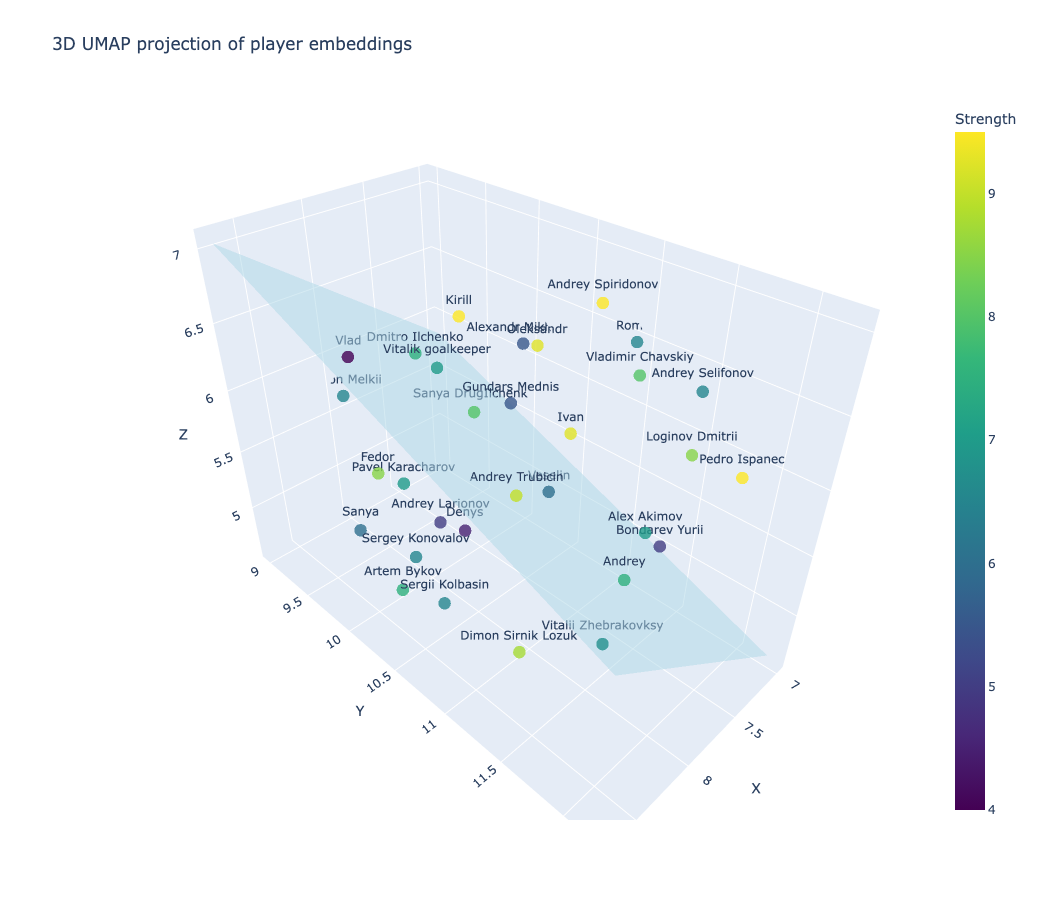

In [55]:
import numpy as np
import umap
import matplotlib.pyplot as plt
import plotly.graph_objs as go

# Generate test embeddings and outcomes (replace these with actual data)
labels_points = [f'{name}' for name in team_members_with_ids.values()]


# Embed to 3D
reducer = umap.UMAP(n_components=3, random_state=42)
embeddings_3d = reducer.fit_transform(player_embeddings_wzp)

x_emb = embeddings_3d[:, 0]
y_emb = embeddings_3d[:, 1]
z_emb = embeddings_3d[:, 2]

x_min = np.min(x_emb)
x_max = np.max(x_emb)
y_min = np.min(y_emb)
y_max = np.max(y_emb)
z_min = np.min(z_emb)
z_max = np.max(z_emb)

# Create interactive 3D scatter plot
scatter = go.Scatter3d(
        x=x_emb,
        y=y_emb,
        z=z_emb,
        # mode='markers',
        mode='markers+text',
        marker=dict(
            size=7,
            color=player_strengths_estimates_wzp,       # Color by this array
            colorscale='Viridis',         # Choose a colorscale
            colorbar=dict(title='Strength'),
            opacity=0.8
        ),
        text=labels_points,          # Hover labels
        hoverinfo='text'
    )
print(f"x_min: {x_min} x_max: {x_max}")
print(f"y_min: {y_min} y_max: {y_max}")
print(f"z_min: {z_min} z_max: {z_max}")


# Define the 3 corners of the triangle in 3D
x_m = [x_min, x_min, x_max, x_max,]  # Replace with your corner x coordinates
y_m = [y_min ,y_max, y_max, y_min]  # Replace with your corner y coordinates
z_m = [(z_max + z_min) / 2 , z_min, (z_max + z_min) / 2 , z_max]  # Replace with your corner z coordinates


# Define two triangles that form the rhombus
i = [0, 0]  # first vertices of triangles
j = [1, 2]  # second vertices of triangles
k = [2, 3]  # third vertices of triangles

# Create the Mesh3d object representing the triangle surface
triangle_surface = go.Mesh3d(
    x=x_m,
    y=y_m,
    z=z_m,
    i=i,
    j=j,
    k=k,
    color='lightblue',
    opacity=0.5,
    name='Rhombus'
)

# fig = go.Figure(data=[scatter, quivers])
fig = go.Figure(data=[triangle_surface, scatter])


fig.update_layout(
    title="3D UMAP projection of player embeddings",
    width=1000,             # <-- Change this to your desired width in pixels
    height=900,  
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Z"
    )
)

fig.show()


In [56]:
import numpy as np
from scipy.stats import pearsonr

# Assuming these variables from your setup:
# player_strengths: numpy array of shape (num_players,)
# embeddings_3d: numpy array of shape (num_players, 3) -- UMAP 3D projections

num_players = player_strengths_estimates_wzp.shape[0] # NUM_PLAYERS ???
correlations = []
print(player_strengths_estimates_wzp.shape)
print(embeddings_3d.shape)
for dim in range(3):
    corr, p_value = pearsonr(embeddings_3d[:, dim], player_strengths_estimates_wzp)
    correlations.append((corr, p_value))
    print(f"Dimension {dim + 1} correlation with base strengths: r = {corr:.4f}, p-value = {p_value:.4g}")

# Optionally, compute average absolute correlation across all 3 dimensions
avg_abs_corr = np.mean([abs(c[0]) for c in correlations])
print(f"Average absolute correlation across 3 components: {avg_abs_corr:.4f}")


(31,)
(31, 3)
Dimension 1 correlation with base strengths: r = -0.0358, p-value = 0.8484
Dimension 2 correlation with base strengths: r = 0.2901, p-value = 0.1134
Dimension 3 correlation with base strengths: r = 0.3319, p-value = 0.06811
Average absolute correlation across 3 components: 0.2193


## SHAP explanations

In [57]:
import shap
shap.__version__

'0.48.0'

In [58]:
background = X
print(np.array(background).shape)
print(background) 

(2, 19, 9)
[array([[17,  1,  4, 22, 13,  0,  0,  0,  0],
       [12, 16,  2, 14,  6,  4,  0,  0,  0],
       [ 6, 12, 17,  2, 19, 30,  0,  0,  0],
       [13, 18,  3, 16, 21,  4, 15,  1,  0],
       [ 2, 17, 12,  8, 21,  0,  0,  0,  0],
       [13, 20, 17,  3,  5,  1, 12, 24,  0],
       [ 3, 15, 12,  1, 17,  8,  0,  0,  0],
       [16,  5,  1, 17, 15, 10,  0,  0,  0],
       [17, 27,  3, 16,  4, 28,  2,  0,  0],
       [ 3, 21,  1, 17,  6,  0,  0,  0,  0],
       [ 2,  5, 21, 23, 17,  0,  0,  0,  0],
       [17, 24, 12, 11,  3,  8, 12, 14,  0],
       [12,  1,  2, 13, 23, 14, 18,  0,  0],
       [ 3, 16,  2,  4, 17, 19, 12, 23, 10],
       [16,  9,  1, 18,  3,  2, 12, 20,  0],
       [12,  2, 13,  1,  4,  9,  8,  6,  0],
       [17, 22, 20, 10,  5,  7,  0,  0,  0],
       [20,  7, 12,  2,  1,  9, 10, 18,  0],
       [15, 17, 13,  1,  3,  2,  4,  0,  0]]), array([[19,  2, 16,  5, 14,  0,  0,  0,  0],
       [27, 17,  3, 30, 18,  1,  0,  0,  0],
       [16,  3,  8,  1, 10,  9,  0,  0,  

In [59]:
combined_background = np.concatenate(background, axis=1)  
combined_background.shape

(19, 18)

In [72]:


def model_wrapper(combined_input):
    # combined_input.shape = (samples, d1 + d2)
    
    X1 = combined_input[:, :9]  # first d1 features
    X2 = combined_input[:, 9:]  # remaining d2 features
    
    # Depending on the model input shape, possibly reshape if needed
    # For example, if input expects 2D arrays directly, no reshape needed
    # If input expects 3D or more, reshape here
    
    # Make prediction
    preds = model.predict([X1, X2])
    
    # If preds is a list (multi-output), pick the output you want, e.g., the first one
    if isinstance(preds, list):
        print(preds[0].shape)
        print(preds[1].shape)
        preds = np.array(preds[0]) # concatenate np.array(preds[1])

    # Ensure preds is a numpy array (or convert using .numpy() if tensor)
    return preds

# combined_background = np.concatenate(background, axis=1)  

# Initialize the SHAP DeepExplainer
explainer = shap.KernelExplainer(model_wrapper, combined_background)

# Explain predictions for some test samples
shap_values = explainer.shap_values(combined_background)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


2025-08-06 19:43:57.702208: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-08-06 19:43:57.702702: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

(19, 1)
(19, 18)


  0%|                                                                                                                                                                                    | 0/19 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
(1, 1)
(1, 18)
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


  5%|█████████                                                                                                                                                                   | 1/19 [00:01<00:29,  1.62s/it]

(39596, 1)
(39596, 18)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(1, 1)
(1, 18)
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
(39596, 1)
(39596, 18)


 11%|██████████████████                                                                                                                                                          | 2/19 [00:03<00:27,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(1, 1)
(1, 18)
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 16%|███████████████████████████▏                                                                                                                                                | 3/19 [00:04<00:25,  1.61s/it]

(39596, 1)
(39596, 18)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(1, 1)
(1, 18)
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
(39596, 1)
(39596, 18)


 21%|████████████████████████████████████▏                                                                                                                                       | 4/19 [00:06<00:24,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(1, 1)
(1, 18)
  85/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

2025-08-06 19:44:04.313758: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-08-06 19:44:04.314005: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 26%|█████████████████████████████████████████████▎                                                                                                                              | 5/19 [00:08<00:23,  1.66s/it]

(39596, 1)
(39596, 18)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(1, 1)
(1, 18)
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 32%|██████████████████████████████████████████████████████▎                                                                                                                     | 6/19 [00:09<00:21,  1.67s/it]

(39596, 1)
(39596, 18)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(1, 1)
(1, 18)
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 37%|███████████████████████████████████████████████████████████████▎                                                                                                            | 7/19 [00:11<00:20,  1.68s/it]

(39596, 1)
(39596, 18)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(1, 1)
(1, 18)
  86/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

2025-08-06 19:44:09.361783: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-08-06 19:44:09.362034: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 42%|████████████████████████████████████████████████████████████████████████▍                                                                                                   | 8/19 [00:13<00:18,  1.67s/it]

(39596, 1)
(39596, 18)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(1, 1)
(1, 18)
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 47%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                          | 9/19 [00:14<00:16,  1.67s/it]

(39596, 1)
(39596, 18)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(1, 1)
(1, 18)
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 53%|██████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 10/19 [00:16<00:15,  1.68s/it]

(39596, 1)
(39596, 18)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(1, 1)
(1, 18)
  84/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

2025-08-06 19:44:14.377804: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-08-06 19:44:14.378059: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                        | 11/19 [00:18<00:13,  1.68s/it]

(39596, 1)
(39596, 18)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(1, 1)
(1, 18)
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
(39596, 1)
(39596, 18)


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 12/19 [00:20<00:11,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(1, 1)
(1, 18)
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 13/19 [00:21<00:10,  1.70s/it]

(39596, 1)
(39596, 18)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
(1, 1)
(1, 18)
  85/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

2025-08-06 19:44:19.541105: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-08-06 19:44:19.541319: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 14/19 [00:23<00:08,  1.70s/it]

(39596, 1)
(39596, 18)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(1, 1)
(1, 18)
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 15/19 [00:25<00:06,  1.69s/it]

(39596, 1)
(39596, 18)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(1, 1)
(1, 18)
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 16/19 [00:26<00:05,  1.67s/it]

(39596, 1)
(39596, 18)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(1, 1)
(1, 18)
  81/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

2025-08-06 19:44:24.569239: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-08-06 19:44:24.569459: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 17/19 [00:28<00:03,  1.69s/it]

(39596, 1)
(39596, 18)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(1, 1)
(1, 18)
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 18/19 [00:30<00:01,  1.70s/it]

(39596, 1)
(39596, 18)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(1, 1)
(1, 18)
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:31<00:00,  1.68s/it]

(39596, 1)
(39596, 18)


In [70]:
shap_values.shape

(19, 18, 18)

In [73]:
explained_games = combined_background

aggregated_contribs = {}

for shap_contribs, game in zip(shap_values, explained_games):
    print(f"shap_contribs: {shap_contribs} for game: {game}")
    for idx, player in enumerate(game):
        if player == 0 and shap_contribs[idx] != 0:
            print(f"Mask contributed ( player: {player}: idx: {idx}): shap_contribs: {shap_contribs[idx]} for game: {game}")
        aggregated_contribs[player] = aggregated_contribs.get(player, 0) + shap_contribs[idx]
    print("="*100)

shap_contribs: [[ 0.03022836]
 [ 0.04266492]
 [ 0.09422577]
 [-0.0257669 ]
 [ 0.        ]
 [ 0.        ]
 [ 0.00485192]
 [ 0.        ]
 [ 0.        ]
 [ 0.08759948]
 [ 0.        ]
 [-0.01810956]
 [ 0.03899773]
 [ 0.073831  ]
 [ 0.01858673]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]] for game: [17  1  4 22 13  0  0  0  0 19  2 16  5 14  0  0  0  0]
Mask contributed ( player: 0: idx: 6): shap_contribs: [0.00485192] for game: [17  1  4 22 13  0  0  0  0 19  2 16  5 14  0  0  0  0]
Mask contributed ( player: 0: idx: 14): shap_contribs: [0.01858673] for game: [17  1  4 22 13  0  0  0  0 19  2 16  5 14  0  0  0  0]
shap_contribs: [[-0.03659318]
 [-0.04308682]
 [-0.05480817]
 [-0.02815471]
 [ 0.        ]
 [-0.01957258]
 [ 0.        ]
 [-0.01577051]
 [ 0.        ]
 [ 0.        ]
 [-0.06272592]
 [-0.03552123]
 [-0.06204766]
 [-0.02375579]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]] for game: [12 16  2 14  6  4  0  0  0 27 17  3 30 18  1  0  0  0]
Mask contributed ( player: 0:

In [64]:
aggregated_contribs_sorted = sorted(aggregated_contribs.items(), key=lambda item: item[1])
aggregated_contribs_sorted

[(np.int64(6), array([-0.60043709])),
 (np.int64(21), array([-0.54130517])),
 (np.int64(2), array([-0.39372855])),
 (np.int64(1), array([-0.30811452])),
 (np.int64(12), array([-0.26827731])),
 (np.int64(16), array([-0.26725418])),
 (np.int64(20), array([-0.1939599])),
 (np.int64(30), array([-0.16110385])),
 (np.int64(11), array([-0.13729741])),
 (np.int64(5), array([-0.09698524])),
 (np.int64(3), array([-0.04523532])),
 (np.int64(29), array([-0.03445206])),
 (np.int64(0), array([-0.01968776])),
 (np.int64(28), array([-0.01928986])),
 (np.int64(8), array([-0.01779258])),
 (np.int64(7), array([-0.01143086])),
 (np.int64(15), array([-0.00472573])),
 (np.int64(24), array([0.])),
 (np.int64(22), array([0.01014287])),
 (np.int64(31), array([0.03519846])),
 (np.int64(23), array([0.16832644])),
 (np.int64(4), array([0.2099856])),
 (np.int64(27), array([0.23081838])),
 (np.int64(10), array([0.24206825])),
 (np.int64(13), array([0.27480076])),
 (np.int64(9), array([0.3247831])),
 (np.int64(14), 

In [ ]:
{1: 'Andrey Spiridonov',
 2: 'Andrey Trubicin',
 3: 'Andrey Larionov',
 4: 'Veselin',
 5: 'Fedor',
 6: 'Andrey Selifonov',
 7: 'Dmitro Ilchenko',
 8: 'Sergii Kolbasin',
 9: 'Vlad',
 10: 'Pavel Karacharov',
 11: 'Sanya',
 12: 'Roman',
 13: 'Ivan',
 14: 'Denys',
 15: 'Vitalii Zhebrakovksy',
 16: 'Oleksandr',
 17: 'Loginov Dmitrii',
 18: 'Artem Bykov',
 19: 'Kirill',
 20: 'Bondarev Yurii',
 21: 'Gundars Mednis',
 22: 'Alexandr Mikhailov',
 23: 'Pedro Ispanec',
 24: 'Dimon Sirnik Lozuk',
 25: 'Sergey Konovalov',
 26: 'Vladimir Chavskiy',
 27: 'Alex Akimov',
 28: 'Andrey',
 29: 'Sanya DrugIlchenko',
 30: 'Vitalik goalkeeper',
 31: 'Dimon Melkii'}

## Ideas

In [32]:
# TODO
# 1. how vector embeddings initialisation affects results? +
# 2. add scores statistics for the player to speedup learning +

# 3. WHy embeddings always different?
# 4. How to check whether player zero embeddings change? - ok, doesn change if we disable embedding L2 regularization +
# 5. can SMOTE help with learning?
# 6. SHAP values, model agnostic?